In [51]:
import skvideo.io
import skvideo.datasets
import numpy as np
import json
import cv2
import os
from matplotlib import pyplot as plt
import math

import tensorflow as tf
from tensorflow import keras

In [52]:
CATEGORIES = ['ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling', 'BalanceBeam', 'BandMarching',
              'BaseballPitch', 'Basketball', 'BasketballDunk', 'BenchPress', 'Biking', 'Billiards', 'BlowDryHair',
              'BlowingCandles', 'BodyWeightSquats', 'Bowling', 'BoxingPunchingBag', 'BoxingSpeedBag', 'BreastStroke',
              'BrushingTeeth', 'CleanAndJerk', 'CliffDiving', 'CricketBowling', 'CricketShot', 'CuttingInKitchen',
              'Diving', 'Drumming', 'Fencing', 'FieldHockeyPenalty', 'FloorGymnastics', 'FrisbeeCatch', 'FrontCrawl',
              'GolfSwing', 'Haircut', 'HammerThrow', 'Hammering', 'HandstandPushups', 'HandstandWalking',
              'HeadMassage', 'HighJump', 'HorseRace', 'HorseRiding', 'HulaHoop', 'IceDancing', 'JavelinThrow',
              'JugglingBalls', 'JumpRope', 'JumpingJack', 'Kayaking', 'Knitting', 'LongJump', 'Lunges',
              'MilitaryParade', 'Mixing', 'MoppingFloor', 'Nunchucks', 'ParallelBars', 'PizzaTossing',
              'PlayingGuitar', 'PlayingPiano', 'PlayingTabla', 'PlayingViolin', 'PlayingCello', 'PlayingDaf',
              'PlayingDhol', 'PlayingFlute', 'PlayingSitar', 'PoleVault', 'PommelHorse', 'PullUps', 'Punch',
              'PushUps', 'Rafting', 'RockClimbingIndoor', 'RopeClimbing', 'Rowing', 'SalsaSpin', 'ShavingBeard',
              'Shotput', 'SkateBoarding', 'Skiing', 'Skijet', 'SkyDiving', 'SoccerJuggling', 'SoccerPenalty',
              'StillRings', 'SumoWrestling', 'Surfing', 'Swing', 'TableTennisShot', 'TaiChi', 'TennisSwing',
              'ThrowDiscus', 'TrampolineJumping', 'Typing', 'UnevenBars', 'VolleyballSpiking', 'WalkingWithDog',
              'WallPushups', 'WritingOnBoard', 'YoYo']

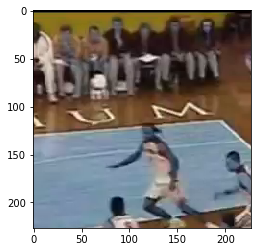

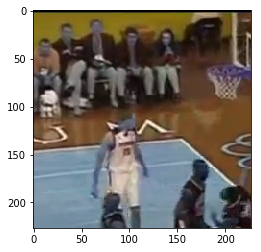

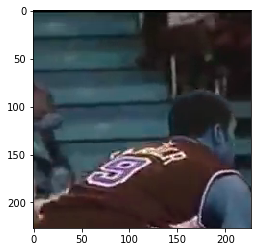

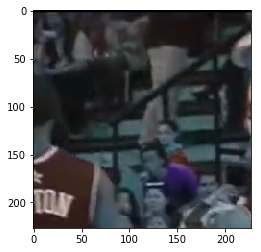

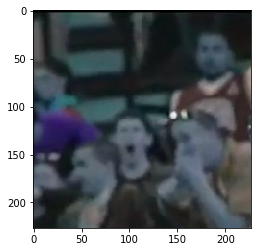

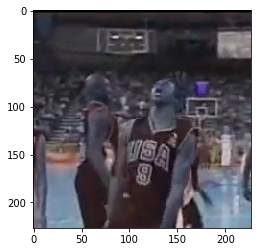

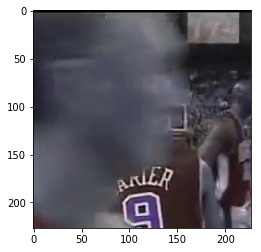

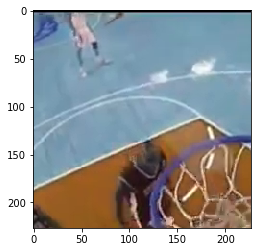

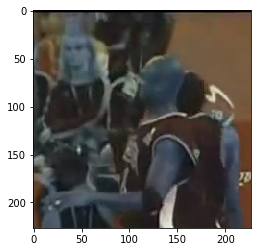

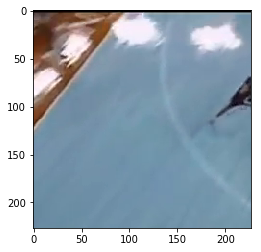

BandMarching
[[3.93063783e-06 2.02728825e-06 9.29063477e-04 9.54708321e-06
  8.03042874e-02 1.79897770e-01 1.09550281e-04 2.04083699e-04
  1.50413020e-03 3.89094603e-05 1.04501963e-01 1.70613148e-05
  3.51032904e-05 2.11965689e-05 2.94664187e-06 2.08786577e-02
  4.29208631e-05 1.53931510e-03 2.79700558e-04 1.51529173e-06
  1.82733784e-04 1.65667489e-01 1.20496570e-05 2.11847673e-05
  4.99216048e-06 1.52621913e-04 2.25396417e-02 2.27622548e-03
  2.23505253e-06 7.00718956e-05 1.86583638e-04 8.63658624e-06
  1.86437134e-07 3.48162692e-04 5.48572920e-04 4.44435391e-05
  1.37380084e-07 2.78544612e-03 7.62887648e-05 2.17478769e-03
  1.18607524e-04 1.10222172e-04 5.28258970e-04 4.45487349e-05
  4.08160413e-04 1.09812885e-03 3.03137995e-06 5.75578895e-07
  8.56470724e-05 1.90122810e-04 7.94354267e-03 1.26050591e-05
  2.19270191e-03 9.98655451e-05 5.68956090e-03 4.83515934e-04
  3.28991399e-03 1.45288073e-02 4.71011954e-05 1.89365971e-06
  1.45002225e-04 7.52226857e-04 4.09812783e-05 1.00263860

In [66]:
def extractFrames(pathIn, modelDir): 
    frameCount = 0
    checkpoint = 0
    framesSaved = 0
    
    cap = cv2.VideoCapture(pathIn)
    
    #############

    numFrames = 0
    while(cap.isOpened()):
      ret, frame = cap.read()
      if(ret == True):
          numFrames+=1
      elif(ret == False):
          break
    frameFreq = numFrames / 10        
    cap.release        
            
    cap = cv2.VideoCapture(pathIn)        
    ##############
    X = [[],[],[],[],[],[],[],[],[],[]]
    i = 0
    
    while (cap.isOpened()):
 
        ret, frame = cap.read()
        
        if(ret == True):
            if(frameCount == checkpoint):
              framesSaved += 1
              checkpoint = int(math.floor(frameFreq * framesSaved))##########
              frame = frame[7:234,46 :273]
              frame = np.array(frame)
              plt.imshow(frame)
              plt.show()
              X[i].append(frame/255.0)
              i += 1
              
            frameCount += 1
        elif(ret == False):
            break
        
    cap.release()
    
    model = tf.keras.models.load_model(modelDir)
    pred = np.argmax(model.predict(X))
    print(CATEGORIES[pred])
    print(model.predict(X))

    
inDirectory = 'C://Users/gosha/OneDrive/Documents/Summer Research/basketball_pred2.mp4'
modelDir = 'C://Users/gosha/OneDrive/Documents/Summer Research/finalModel_noDrop/'

extractFrames(inDirectory, modelDir)
            
        